In [1]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import scipy as sc

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)


In [3]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom'
                     )

    plt.savefig(filename)

In [4]:
weights_layer1 = np.load("layer1_e0.npy")
weights_layer2 = np.load("layer1_e1.npy")
print(weights_layer1.shape, weights_layer2.shape)

(500, 1000) (500, 1000)


In [5]:
weights_layer1[:10]

array([[0.        , 1.0330435 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15781115, 0.        , 0.        , ..., 0.        , 2.4766815 ,
        0.        ],
       [0.        , 2.8263783 , 0.        , ..., 4.8947377 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.21469   , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

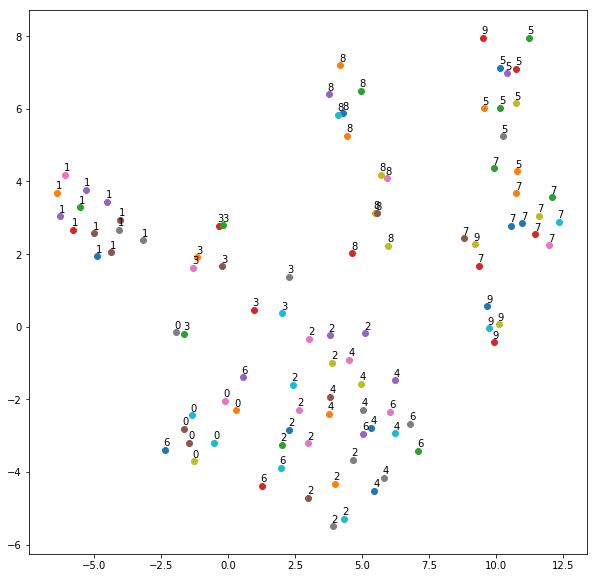

In [6]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
lowD_1 = tsne.fit_transform(weights_layer1[:100])
plot_with_labels(lowD_1, test_labels[:100])

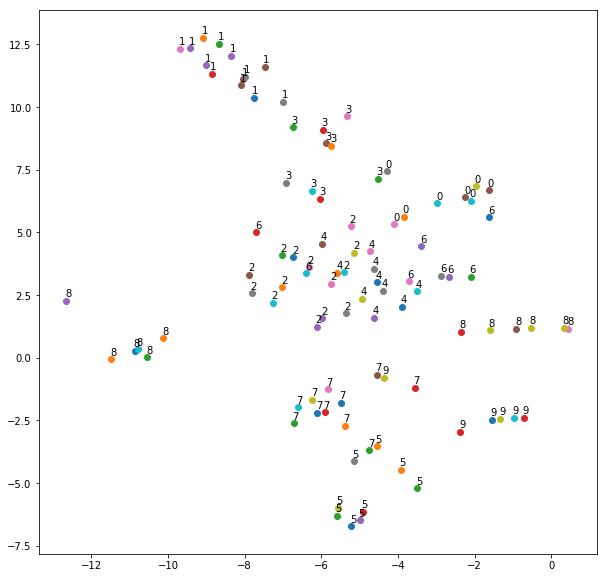

In [7]:
lowD_2 = tsne.fit_transform(weights_layer2[:100])
plot_with_labels(lowD_2, test_labels[:100])

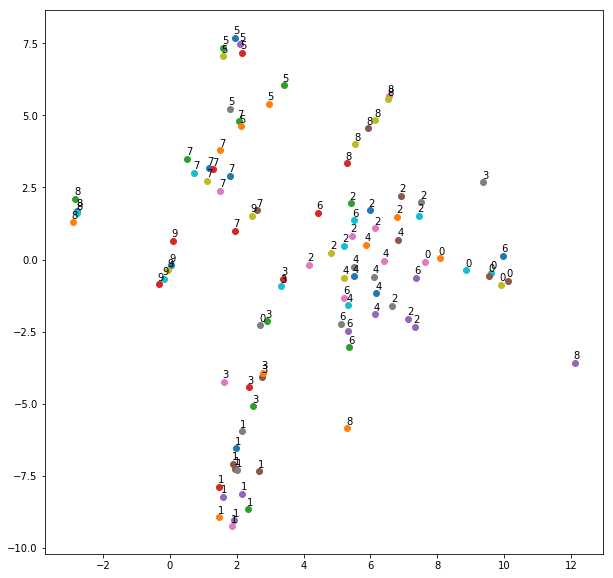

In [8]:
tsne.set_params(init=lowD_1)
lowD_2 = tsne.fit_transform(weights_layer2[:100])
plot_with_labels(lowD_2, test_labels[:100])

In [9]:
import alignment as al

In [10]:
source_matrix = lowD_2
target_matrix = lowD_1

In [11]:
source_matrix_new = al.make_transform(source_matrix, target_matrix)

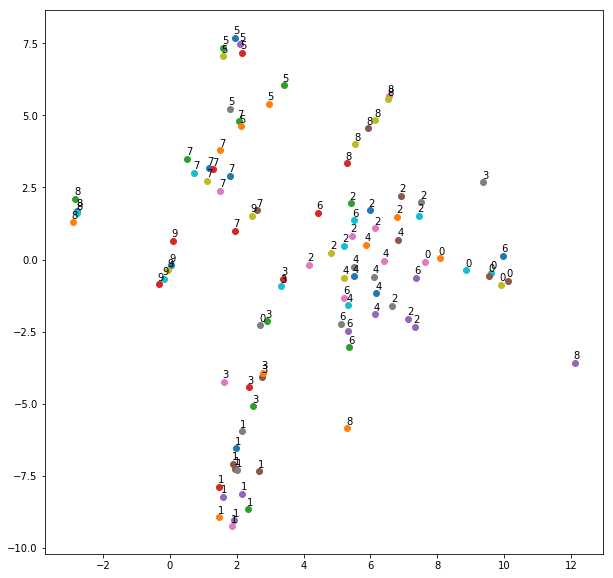

In [12]:
plot_with_labels(source_matrix, test_labels[:100])

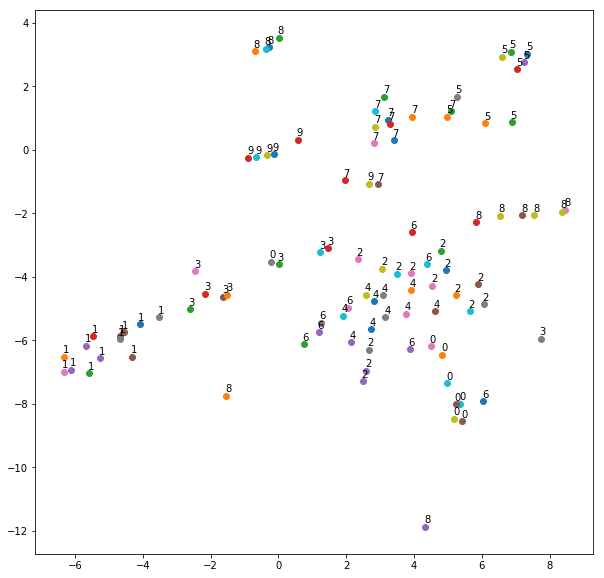

In [13]:
#doesn't seem to actually transform... doube check with others? 
plot_with_labels(source_matrix_new, test_labels[:100])

In [14]:
print("similarity of source to source_new", al.avg_cos_sim(source_matrix, source_matrix_new))
print("similarity of vectors before re-align",al.avg_cos_sim(source_matrix, target_matrix))
print("similarity of vectors after re-align",al.avg_cos_sim(source_matrix_new, target_matrix))
print("similarity of ")

similarity of source to source_new 0.40483361303806303
similarity of vectors before re-align 0.712917214455083
similarity of vectors after re-align 0.4795899827312678
similarity of 
